# Manufacturing Energy of One module each year

Assuming a 2.0 m^2 module

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
#plt.rcParams['figure.figsize'] = (10, 6)

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyofMFG')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
import PV_ICE
PV_ICE.__version__

'v0.2.0+452.g6fc1b20.dirty'

In [3]:
#creating scenarios for identical power and identical area deployed
MATERIALS = ['glass','silicon','silver', 'aluminium_frames','copper',  'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [4]:
colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B'] #colors for material plots 

In [5]:
#load in a baseline and materials for modification
sim_anModule = PV_ICE.Simulation(name='sim_anModule', path=testfolder)

sim_anModule.createScenario(name='baseline', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim_anModule.scenario['baseline'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyofMFG


In [6]:
idx_temp = pd.RangeIndex(start=1995,stop=2051,step=1) #create the index
area_deploy_anModule = pd.DataFrame(index=idx_temp, dtype=float) #create an empty DF
area_deploy_anModule['Area'] = 2.0
area_deploy_anModule.head()

,Area
1995,2.0
1996,2.0
1997,2.0
1998,2.0
1999,2.0


In [7]:
#no circularity
sim_anModule.scenMod_noCircularity()


In [8]:
sim_anModule.calculateFlows(installByArea=list(area_deploy_anModule['Area']))

>>>> Calculating Material Flows <<<<

Working on Scenario:  baseline
********************
Calculating installed capacity based on installed Area
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  baseline
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet


In [9]:
anModule_yearly, anModule_cum = sim_anModule.aggregateResults()
anModule_allenergy, anModule_energyGen, anModule_energy_demands = sim_anModule.aggregateEnergyResults()
sim_anModule.saveSimulation(customname='_Energy_MFGing_Baseline')

:) Saved Input and Output Dataframes


C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demands[colname] = energy_demands.filter(like=scen).sum(axis=1)


In [10]:
#select material demands that are not fuel
e_fuels = anModule_energy_demands.filter(like='_fuel')
e_energydemands = anModule_energy_demands.loc[:,~anModule_energy_demands.columns.isin(e_fuels.columns)]

In [11]:
#Materials
annual_mfg_glass = e_energydemands.filter(like='glass').sum(axis=1)
annual_mfg_silicon = e_energydemands.filter(like='silicon').sum(axis=1)
annual_mfg_silver = e_energydemands.filter(like='silver').sum(axis=1)
annual_mfg_aluminium_frames = e_energydemands.filter(like='aluminium_frames').sum(axis=1)
annual_mfg_copper = e_energydemands.filter(like='copper').sum(axis=1)
annual_mfg_encapsulant = e_energydemands.filter(like='encapsulant').sum(axis=1)
annual_mfg_backsheet = e_energydemands.filter(like='backsheet').sum(axis=1)
annual_mfg_mod = e_energydemands.filter(like='mod').sum(axis=1)

e_cols = ['glass','silicon','silver', 'aluminium_frames', 'copper','encapsulant', 'backsheet','module']

annual_e_demand_mat_mod = pd.concat([annual_mfg_glass,annual_mfg_silicon,annual_mfg_silver,annual_mfg_aluminium_frames,
          annual_mfg_copper,annual_mfg_encapsulant,annual_mfg_backsheet,annual_mfg_mod], axis=1, keys=e_cols)
annual_e_demand_mat_mod_MW = annual_e_demand_mat_mod/1e6

In [18]:
annual_e_demand_mat_mod_MW.iloc[:,0:2]#.sum(axis=1)

,glass,silicon
year,,
1995,0.079197,2.719802
1996,0.079197,2.444925
1997,0.079197,2.254103
1998,0.078298,2.058318
1999,0.077399,1.879413
2000,0.076503,1.400407
2001,0.075608,1.247571
2002,0.074525,1.023990
2003,0.073447,0.817456


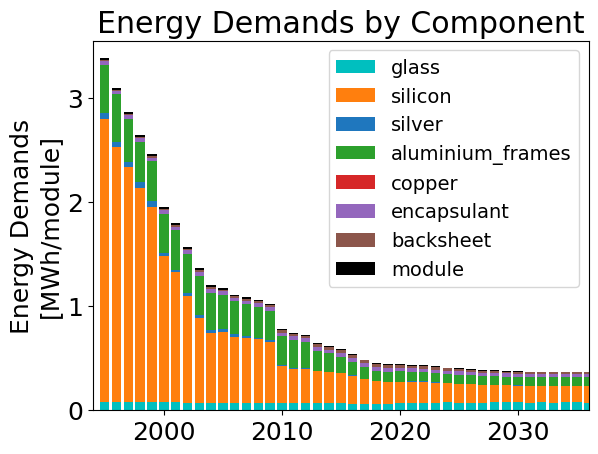

In [19]:


plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['glass'], color = colormats[0])

plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['silicon'], 
        bottom = annual_e_demand_mat_mod_MW.iloc[:,0], color=colormats[1])

plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['silver'],
        bottom = annual_e_demand_mat_mod_MW.iloc[:,0:2].sum(axis=1), color=colormats[2])

plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['aluminium_frames'],
        bottom = annual_e_demand_mat_mod_MW.iloc[:,0:3].sum(axis=1), color=colormats[3])

plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['copper'],
        bottom = annual_e_demand_mat_mod_MW.iloc[:,0:4].sum(axis=1) , color=colormats[4])

plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['encapsulant'], 
        bottom = annual_e_demand_mat_mod_MW.iloc[:,0:5].sum(axis=1) ,color=colormats[5])

plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['backsheet'],
        bottom = annual_e_demand_mat_mod_MW.iloc[:,0:6].sum(axis=1), color=colormats[6])

plt.bar(annual_e_demand_mat_mod.index, annual_e_demand_mat_mod_MW['module'],
        bottom = annual_e_demand_mat_mod_MW.iloc[:,0:7].sum(axis=1), color='black')

plt.xlim(1994,2036)
plt.title('Energy Demands by Component')
plt.ylabel('Energy Demands\n[MWh/module]')
plt.legend(e_cols, fontsize=14)